# <center>Laboratorium 9<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import math


***Temat główny:***

Znajdź miejsca zerowe funkcji: 
$ 
f(x) = e^{-2x} + x^2 - 1 
$,

metodami:
* Bisekcji,
* Siecznych,
* Newtona

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Wykonaj wykres funckji oraz jej pierwszej i drugiej pochodnej (obliczonej analitycznie) na jednym rysunku w przedziale pozwalającym na zgrubne określenie miejsc zerowych. Wykres powinien być odpowiednio opisany. Określ przedział miejsca zerowego.

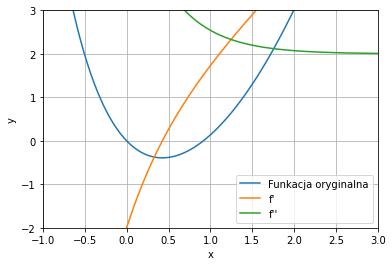

In [14]:
x = np.linspace(-10,10,1000)
y = main.fun(x)
dy = main.dfun(x)
ddy = main.ddfun(x)
plt.plot(x, y, label = 'Funkacja oryginalna')
plt.plot(x, dy, label = "f'")
plt.plot(x, ddy, label = "f''")
plt.grid()
plt.xlim(-1, 3)
plt.ylim(-2, 3)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

***Zadanie 2.***  
Zaimplementuj [metodę bisekcji](https://en.wikipedia.org/wiki/Bisection_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) funkcja na końcach przedziału przyjmuje przeciwne znaki

***Zadanie 3.***  
Zaimplementuj [metodę siecznych](https://en.wikipedia.org/wiki/Secant_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadanie 4.***  
Zaimplementuj [metodę Newtona](https://en.wikipedia.org/wiki/Newton%27s_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadania 5.***  
Dla głównej funkcji z zadania 1 znajdź miejsca zerowe przy użyciu:

* funkcji root dostępnej w pakiecie scipy.optimize
* funkcji fsolve dostępnej w pakiecie scipy.optimize


In [24]:
import scipy.optimize
a_b = [0.5,4]
time_avg = [None , None]
time_std = [None , None]
tags = ["scipy.root", "scipy.fsolve"]
root_solution = scipy.optimize.root(main.fun,a_b[0])
root_iter = root_solution.nfev
root_solution = root_solution.x[0]
fsolve_solution = scipy.optimize.fsolve(main.fun, a_b[0] , full_output=True, epsfcn=1e-10)
fsolve_iter = fsolve_solution[1]['nfev']
fsolve_solution = fsolve_solution[0]
saved_timing = %timeit -r 10 -n 100 -o scipy.optimize.root(main.fun,a_b[0])
time_avg[0] = saved_timing.average
time_std[0] = saved_timing.stdev
saved_timing = %timeit -r 10 -n 100 -o scipy.optimize.fsolve(main.fun, a_b[0])
time_avg[1] = saved_timing.average
time_std[1] = saved_timing.stdev


74.1 µs ± 3.69 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
71.1 µs ± 2.8 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


***Zadanie 6.***  
Dla głównej funkcji oraz przedziału zdefiniowanego z zadania 1 znajdź miejsca zerowe przy użyciu:

* metody bisekcji
* metody siecznych
* metody Newtona

z tolerancją $10^{-10}$

Zbadaj dokładność(względem rozwiązania z zadania 5) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

275 µs ± 18.9 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
1.23 ms ± 56.2 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
48.8 µs ± 2.24 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


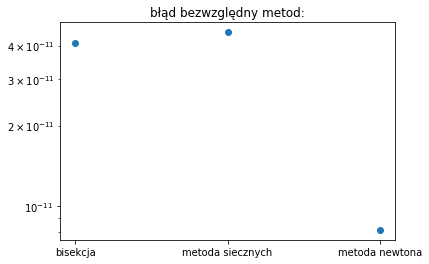

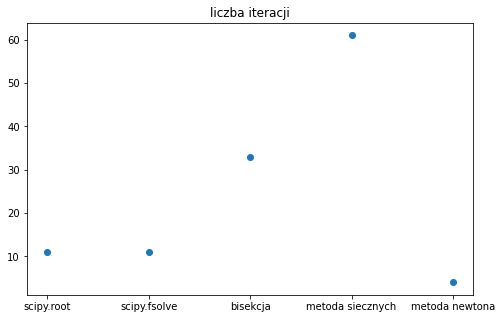

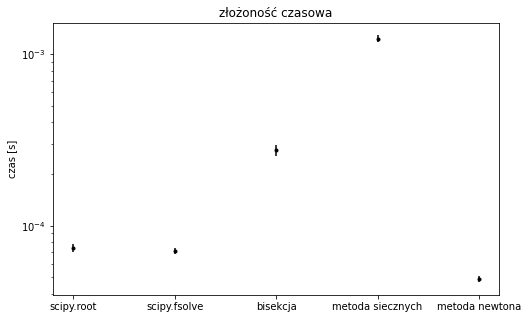

In [28]:
time_avg_2 = [None , None, None]
time_std_2 = [None , None, None]
eps = 10**-10
max_itr = 100
tags2 = ["bisekcja", "metoda siecznych", "metoda newtona"]

bisection_solution,bisection_iter = main.bisection(a_b[0],a_b[1],main.fun,eps,max_itr)
secant_solution,secant_iter = main.secant(a_b[0],a_b[1],main.fun,eps,max_itr)
newton_solution,newton_iter = main.newton(main.fun,main.dfun,main.ddfun,a_b[0],a_b[1],eps,max_itr)
saved_timing = %timeit -r 10 -n 100 -o main.bisection(a_b[0],a_b[1],main.fun,eps,max_itr)
time_avg_2[0] = saved_timing.average
time_std_2[0] = saved_timing.stdev
saved_timing = %timeit -r 10 -n 100 -o main.secant(a_b[0],a_b[1],main.fun,eps,max_itr)
time_avg_2[1] = saved_timing.average
time_std_2[1] = saved_timing.stdev
saved_timing = %timeit -r 10 -n 100 -o main.newton(main.fun,main.dfun,main.ddfun,a_b[0],a_b[1],eps,max_itr)
time_avg_2[2] = saved_timing.average
time_std_2[2] = saved_timing.stdev
y_iter = np.array([root_iter,fsolve_iter,bisection_iter,secant_iter,newton_iter])
y_time_avg = np.array(time_avg + time_avg_2)
y_time_std = np.array(time_std + time_std_2)
y_error = abs(np.array([bisection_solution,secant_solution,newton_solution]) - fsolve_solution)
x_error = np.array([0.5 +i for i in range(3)])
x = np.array([0.5 +i for i in range(5)])
plt.scatter(x_error, y_error)
plt.title("błąd bezwzględny metod:")
plt.xticks(x_error,tags2)
plt.yscale("log")
plt.show()
plt.figure(figsize=[8,5])
plt.scatter(x, y_iter)
plt.title("liczba iteracji")
plt.xticks(x,tags+tags2)
plt.show()
plt.figure(figsize=[8,5])
plt.errorbar(x, y_time_avg,y_time_std,fmt = '.k')
plt.title("złożoność czasowa")
plt.ylabel("czas [s]")
plt.yscale("log")
plt.xticks(x,tags+tags2)
plt.show()

## Wnioski
na laboratoriach miałem okazję zapoznać się z iteracyjnymi metodami wiliczania pierwiastków równań nieliniowych. z wykresów wynika że najlepszą pod względem złożoności czasowej , stabilności jak i ilości iteracji wypada metoda newtona lecz niestety posiada ona pewne ograniczenia w postaci potrzeby znajomości pochodnej funkcji na danym przedziale (na którym występuje miejsce zerowe) w postaci jawnej, co więcej aby metoda newtona zadziałała muszą być spełnione odpowiednie warunki na danym przedziale tzn pierwsza i druga pochodna funkcji muszą posiadać stały znak. jest to warunek konieczny zadziałania algorytmu a zarazem bardzo trudny do sprawdzenia w sposób numeryczny (wymaga szukania minimów i maksymów metodą gradientową co mija się z celem w tym przypadku[duża złożoność obliczeniowa] lepiej wybrać metodę bisekcji). następną najgorszą w tym zestawieniu metodą jest metoda siecznych które ma o ponad rząd wielkości większą złożoność czasową i obliczeniową oraz generuje największe błędy podobnie jak metoda newtona także posiada dość ciękie do sprawdzenia ograniczenia w postaci wymogu braku punktów przegięcia oraz ekstremów na danym przedziale. najbardziej uniwersalną metodą wydaje się być metoda bisekcji która jest dość uniwersalna oraz ma mniejszą złożoność czasową niż metoda siecznych. Warto wspomnieć że funkcje wbudowane w modół scipy są znacznie szybsze niż bisekcja lub metoda siecznych lecz nadal wolniejsze od metody newtona. Implementacja algorymów podczas laboratoriów nie przyspożyła rzadnych problemów. Uważam że poznane metody są bardzo przydatne w analizie numerycznej funkcji nieliniowych pod względem wyznaczania ich pierwiastków